# Курсовой проект №2

**Подключение библиотек и скриптов**

In [257]:
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

In [1]:
import pandas as pd
import numpy as np
import pickle
import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

**Пути к директориям и файлам**

In [3]:
# course test dataset
TRAIN_DATASET_PATH = 'course_project_train.csv'

# prepare dataset
PREP_DATASET_PATH = 'prep_dataset.csv'

# prepare dataset_test
PREP_DATASET_PATH_TEST = 'prep_dataset_test.csv'

# course train dataset
TEST_DATASET_PATH = 'course_project_test.csv'

# training project data
TRAINING_PROJECT_DATA = 'training_project_data.csv'

### Загрузка данных

In [156]:
df_train = pd.read_csv(TEST_DATASET_PATH)
# df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [5]:
df_train.shape

(7500, 17)

In [6]:
df_train.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

In [7]:
df_train['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

In [8]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [9]:
df_test.shape

(2500, 16)

### Обзор данных<a class="anchor" id="review"></a>

In [10]:
df_train.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

**Обзор номинативных признаков**

In [12]:
for cat_colname in df_train.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

### Обработка пропусков

In [118]:
len(df_train) - df_train.count()

Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

### Обработка пропусков

In [41]:
TARGET_NAME = 'Credit Default'

In [42]:
df_train[TARGET_NAME].describe()

count    7500.000000
mean        0.281733
std         0.449874
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Credit Default, dtype: float64

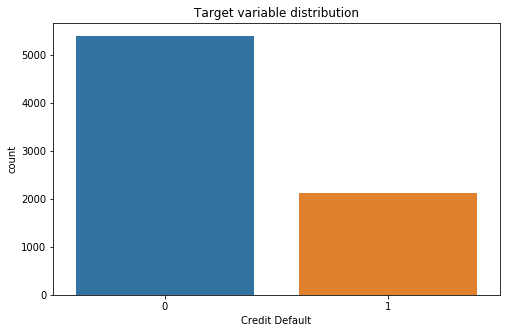

In [17]:
plt.figure(figsize=(8, 5))

sns.countplot(x=TARGET_NAME, data=df_train)

plt.title('Target variable distribution')
plt.show()

In [85]:
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()

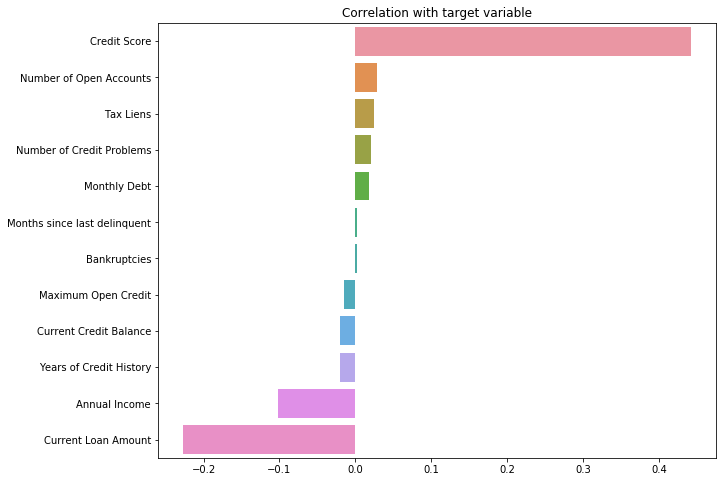

In [86]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

In [157]:
df_train.loc[df_train['Years in current job'].isna(), 'Years in current job'] = '7 years'

In [158]:
# df_train.loc[df_train['Months since last delinquent'].isna(), 'Months since last delinquent'] = 0.0
df_train = df_train.drop(columns=['Months since last delinquent','Bankruptcies'])

In [159]:
# df_train.loc[df_train['Bankruptcies'].isna(), 'Bankruptcies'] = 0.0

In [160]:
df_train['Credit Score'].describe()

count    1987.000000
mean     1234.516860
std      1740.219442
min       585.000000
25%       710.000000
50%       731.000000
75%       743.000000
max      7480.000000
Name: Credit Score, dtype: float64

In [161]:
df_train.loc[df_train['Credit Score'].isna(), 'Credit Score'] = df_train['Credit Score'].mean()

In [92]:
# df_train.loc[df_train['Current Loan Amount']>5.198820e+05]=5.198820e+05

In [162]:
df_train['Annual Income'].describe()

count    1.987000e+03
mean     1.366922e+06
std      9.171252e+05
min      1.065330e+05
25%      8.523115e+05
50%      1.178475e+06
75%      1.629734e+06
max      1.497561e+07
Name: Annual Income, dtype: float64

In [163]:
df_train.loc[df_train['Annual Income'].isna(), 'Annual Income'] = df_train['Annual Income'].mean()

### Построение новых признаков

In [37]:
# df_train['ID'] = df_train.index.tolist()

**Dummies**

In [164]:
df_train['IS_SHORT'] = df_train['Term'].map({'Short Term':'1', 'Long Term':'0'}).astype(int)

In [165]:
for cat_colname in df_train.select_dtypes(include='object').columns[1:]:
    df_train = pd.concat([df_train, pd.get_dummies(df_train[cat_colname], prefix=cat_colname)], axis=1)

In [97]:
BASE_FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()

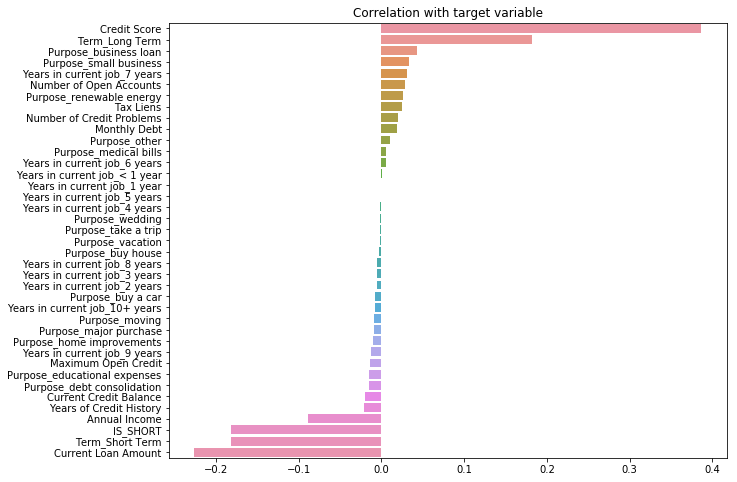

In [98]:
corr_with_target = df_train[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

### Сохранение обучающего датасета

In [166]:
# df_train.to_csv(PREP_DATASET_PATH, index=False, encoding='utf-8')
df_train.to_csv(PREP_DATASET_PATH_TEST, index=False, encoding='utf-8')

In [167]:
len(df_train) - df_train.count()

Home Ownership                    0
Annual Income                     0
Years in current job              0
Tax Liens                         0
Number of Open Accounts           0
Years of Credit History           0
Maximum Open Credit               0
Number of Credit Problems         0
Purpose                           0
Term                              0
Current Loan Amount               0
Current Credit Balance            0
Monthly Debt                      0
Credit Score                      0
IS_SHORT                          0
Years in current job_1 year       0
Years in current job_10+ years    0
Years in current job_2 years      0
Years in current job_3 years      0
Years in current job_4 years      0
Years in current job_5 years      0
Years in current job_6 years      0
Years in current job_7 years      0
Years in current job_8 years      0
Years in current job_9 years      0
Years in current job_< 1 year     0
Purpose_business loan             0
Purpose_buy a car           

# Построение модели классификации.

In [168]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [169]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

**Пути к директориям и файлам**

In [170]:
DATASET_PATH = 'course_project_train.csv'
PREP_DATASET_PATH = 'prep_dataset.csv'
PREP_DATASET_PATH_TEST = 'prep_dataset_test.csv'
SCALER_FILE_PATH = 'scaler.pkl'
MODEL_FILE_PATH = 'model.pkl'

In [178]:
df_base = pd.read_csv(DATASET_PATH)
df = pd.read_csv(PREP_DATASET_PATH_TEST)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Purpose,Term,...,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
0,Rent,1.366922e+06,4 years,0.0,9.0,12.5,220968.0,0.0,debt consolidation,Short Term,...,0,0,0,0,0,0,0,0,0,1
1,Rent,2.318380e+05,1 year,0.0,6.0,32.7,55946.0,0.0,educational expenses,Short Term,...,0,0,0,0,0,0,0,0,0,1
2,Home Mortgage,1.152540e+06,3 years,0.0,10.0,13.7,204600.0,0.0,debt consolidation,Short Term,...,0,0,0,0,0,0,0,0,0,1
3,Home Mortgage,1.220313e+06,10+ years,0.0,16.0,17.0,456302.0,0.0,debt consolidation,Short Term,...,0,0,0,0,0,0,0,0,0,1
4,Home Mortgage,2.340952e+06,6 years,0.0,11.0,23.6,1207272.0,0.0,debt consolidation,Long Term,...,0,0,0,0,0,0,0,0,1,0


In [180]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_base.columns.drop(['Months since last delinquent', 'Bankruptcies','Credit Default']).tolist()
# NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME, 'ID'] + BASE_FEATURE_NAMES).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES).tolist()

In [181]:
# NUMERIC_FEATURE_NAMES = ['Annual Income', 'Tax Liens', 'Number of Open Accounts', 
#                          'Maximum Open Credit', 'Number of Credit Problems', 
#                          'Months since last delinquent','Bankruptcies', 'Current Loan Amount', 
#                          'Current Credit Balance', 'Monthly Debt', 'Credit Score']
NUMERIC_FEATURE_NAMES = ['Annual Income', 'Tax Liens', 'Number of Open Accounts', 
                         'Maximum Open Credit', 'Number of Credit Problems', 
                         'Current Loan Amount', 
                         'Current Credit Balance', 'Monthly Debt', 'Credit Score']

FEATURE_NAMES_SELECTED = NUMERIC_FEATURE_NAMES + NEW_FEATURE_NAMES

### Нормализация данных

In [182]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NUMERIC_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUMERIC_FEATURE_NAMES])

df = df_norm.copy()

### Разбиение на train и test

In [145]:
X = df[FEATURE_NAMES_SELECTED]
y = df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=211)

### Балансировка целевой переменной

In [146]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    4047
1    3156
Name: Credit Default, dtype: int64

In [147]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

### Построение и оценка базовых моделей

**Логистическая регрессия**

In [148]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.68      0.84      0.75      4047
           1       0.71      0.50      0.58      3156

   micro avg       0.69      0.69      0.69      7203
   macro avg       0.69      0.67      0.67      7203
weighted avg       0.69      0.69      0.68      7203

TEST

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1340
           1       0.58      0.52      0.55       535

   micro avg       0.76      0.76      0.76      1875
   macro avg       0.70      0.68      0.69      1875
weighted avg       0.75      0.76      0.75      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1139  201
1                258  277


**k ближайших соседей**

In [730]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      4047
           1       0.78      0.72      0.75      3156

   micro avg       0.79      0.79      0.79      7203
   macro avg       0.78      0.78      0.78      7203
weighted avg       0.78      0.79      0.78      7203

TEST

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1340
           1       0.45      0.49      0.47       535

   micro avg       0.68      0.68      0.68      1875
   macro avg       0.62      0.62      0.62      1875
weighted avg       0.69      0.68      0.68      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1014  326
1                273  262


### Бустинговые алгоритмы

*LightGBM*

In [731]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4047
           1       0.93      0.83      0.88      3156

   micro avg       0.90      0.90      0.90      7203
   macro avg       0.90      0.89      0.90      7203
weighted avg       0.90      0.90      0.90      7203

TEST

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1340
           1       0.55      0.48      0.51       535

   micro avg       0.74      0.74      0.74      1875
   macro avg       0.68      0.66      0.67      1875
weighted avg       0.73      0.74      0.73      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1132  208
1                280  255


*CatBoost*

In [155]:
model_catb = catb.CatBoostClassifier(n_estimators=150, max_depth=7,learning_rate=0.1,silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4047
           1       0.90      0.78      0.84      3156

   micro avg       0.87      0.87      0.87      7203
   macro avg       0.87      0.86      0.86      7203
weighted avg       0.87      0.87      0.87      7203

TEST

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1340
           1       0.60      0.49      0.54       535

   micro avg       0.76      0.76      0.76      1875
   macro avg       0.71      0.68      0.69      1875
weighted avg       0.75      0.76      0.75      1875

CONFUSION MATRIX

col_0            0.0  1.0
Credit Default           
0               1170  170
1                275  260


**Обучение и оценка финальной модели**

In [733]:
final_model = LogisticRegression()
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      4047
           1       0.70      0.51      0.59      3156

   micro avg       0.69      0.69      0.69      7203
   macro avg       0.69      0.67      0.67      7203
weighted avg       0.69      0.69      0.68      7203

TEST

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1340
           1       0.55      0.52      0.54       535

   micro avg       0.74      0.74      0.74      1875
   macro avg       0.68      0.68      0.68      1875
weighted avg       0.74      0.74      0.74      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1112  228
1                256  279


### Сохранение модели

In [349]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

**Model**

In [350]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

In [183]:
df_base = pd.read_csv(DATASET_PATH)
df = pd.read_csv(PREP_DATASET_PATH_TEST)
df['Purpose_renewable energy'] = 0
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Purpose,Term,...,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term,Purpose_renewable energy
0,Rent,1.366922e+06,4 years,0.0,9.0,12.5,220968.0,0.0,debt consolidation,Short Term,...,0,0,0,0,0,0,0,0,1,0
1,Rent,2.318380e+05,1 year,0.0,6.0,32.7,55946.0,0.0,educational expenses,Short Term,...,0,0,0,0,0,0,0,0,1,0
2,Home Mortgage,1.152540e+06,3 years,0.0,10.0,13.7,204600.0,0.0,debt consolidation,Short Term,...,0,0,0,0,0,0,0,0,1,0
3,Home Mortgage,1.220313e+06,10+ years,0.0,16.0,17.0,456302.0,0.0,debt consolidation,Short Term,...,0,0,0,0,0,0,0,0,1,0
4,Home Mortgage,2.340952e+06,6 years,0.0,11.0,23.6,1207272.0,0.0,debt consolidation,Long Term,...,0,0,0,0,0,0,0,1,0,0


In [184]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_base.columns.drop(['Credit Default','Months since last delinquent', 'Bankruptcies']).tolist()
NEW_FEATURE_NAMES = df.columns.drop(BASE_FEATURE_NAMES).tolist()

In [185]:
NUMERIC_FEATURE_NAMES = ['Annual Income', 'Tax Liens', 'Number of Open Accounts', 
                         'Maximum Open Credit', 'Number of Credit Problems', 
                         'Current Loan Amount', 
                         'Current Credit Balance', 'Monthly Debt', 'Credit Score']
FEATURE_NAMES_SELECTED = NUMERIC_FEATURE_NAMES + NEW_FEATURE_NAMES

In [186]:
scaler = StandardScaler()

df_norm = df.copy()
df_norm[NUMERIC_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUMERIC_FEATURE_NAMES])
df = df_norm.copy()

In [187]:
X = df[FEATURE_NAMES_SELECTED]

In [194]:
res = pd.DataFrame(model_lr.predict(X).astype(int))

In [195]:
res.rename(columns = {res.columns[0]: 'Credit Default'}, inplace = True)

In [196]:
res.describe()

,Credit Default
count,2500.000000
mean,0.615200
std,0.486645
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [197]:
res['Id'] = range(7500, 10000)

In [198]:
res.loc[:,['Id','Credit Default']].to_csv('SKashenkov_predictions.csv',index=None)